
#Color Identification in Images

**MATURI TANUJ**

Computer Vision Intern at The Spark Foundation

**Import the required libraries**

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

**Read the Image**

The type of this input is <class 'numpy.ndarray'>
Shape: (2160, 3840, 3)


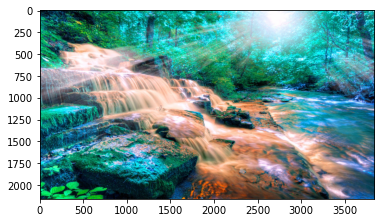

In [ ]:
image = cv2.imread('pic.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

The color of the image looks a bit off. This is because, by default, OpenCV reads image in the sequence Blue Green Red (BGR). 

Thus, to view the actual image we need to convert the rendering to Red Green Blue (RGB).

**Represented image as a combination of three colors, Red, Blue and Green**

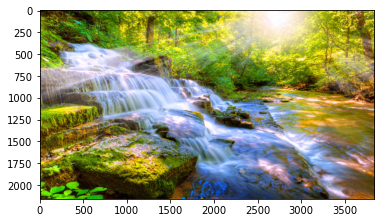

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

## Color Identification

RGB to Hex Conversion

In [ ]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

Read image in RGB color space

In [ ]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

Get colors from an image

In [ ]:
modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

**Algorithm :**
    
    KMeans Algorithm
    

Implement KMeans algorithm to get number of colors

In [ ]:
clf = KMeans(n_clusters = 6)
labels = clf.fit_predict(modified_image)

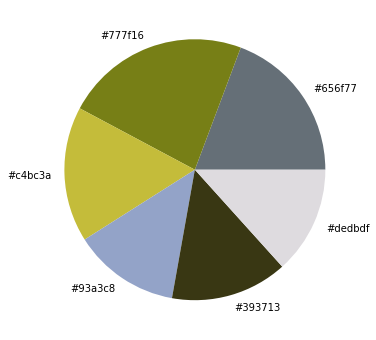

In [ ]:
counts = Counter(labels)

center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

if (6):
    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

